In [2]:
import pandas as pd

df =pd.read_csv("data.csv",index_col=0)
#index_col=0表示将第一列作为索引

#Q1
print("前十行数据：")
print(df.head(10))
print(f"行数：{df.shape[0]}\n列数：{df.shape[1]}")


前十行数据：
    CNTRYID  CNT  CNTSCHID   CYC  NatCen  Region  STRATUM  SUBNATIO  OECD  \
1         8  ALB    800002  07MS     800     800  ALB0109     80000     0   
2         8  ALB    800003  07MS     800     800  ALB0109     80000     0   
3         8  ALB    800004  07MS     800     800  ALB0211     80000     0   
4         8  ALB    800005  07MS     800     800  ALB0107     80000     0   
5         8  ALB    800006  07MS     800     800  ALB0105     80000     0   
6         8  ALB    800007  07MS     800     800  ALB0109     80000     0   
7         8  ALB    800008  07MS     800     800  ALB0210     80000     0   
8         8  ALB    800009  07MS     800     800  ALB0203     80000     0   
9         8  ALB    800010  07MS     800     800  ALB0210     80000     0   
10        8  ALB    800011  07MS     800     800  ALB0206     80000     0   

    ADMINMODE  ...  EDUSHORT  STAFFSHORT  STUBEHA  TEACHBEHA  SCMCEG  \
1           2  ...    1.2478     -1.4551  -1.1797    -2.0409 -1.0391   
2

#### `pandas.read_csv()`
读取本地/网络上的CSV文件，生成DataFrame对象（pandas中的一种数据结构）
常用参数：
1. sep:指定分隔符（CSV默认以逗号分隔）
2. header：指定哪一行作为列名（默认header=0）
3. usecols：指定读取某几列（eg：`usecols=['column1', 'column3']`）
4. dtype:指定每列的数据类型。eg:`pd.read_csv('data.csv', dtype={'column1': int, 'column2': float})`可以确保 “column1” 列被读取为整数类型，“column2” 列被读取为浮点数类型
5. na_values:指定哪些值应该被识别为**缺失值**。eg:`pd.read_csv('data.csv', na_values=['NA', '-'])`(NA和-被识别为缺失值)

In [3]:
#Q2
# 各列缺失值统计
missing_values = df.isnull().sum()
print("各列缺失值数量：")
print(missing_values)

# 删除最后一列
df = df.drop(df.columns[-1], axis=1)
#axis=1表示删除列，axis=0表示删除行

# 更新后的缺失值统计
missing_updated = df.isnull().sum()
max_missing_col = missing_updated.idxmax()
#idxmax()输出当前对象最多的值的索引
no_missing_cols = missing_updated[missing_updated == 0].index.tolist()
#tolist()将索引转换为列表

print(f"缺失值最多的列：{max_missing_col}")
print(f"无缺失值的列：{no_missing_cols}")



各列缺失值数量：
CNTRYID                 0
CNT                     0
CNTSCHID                0
CYC                     0
NatCen                  0
                    ...  
W_SCHGRNRABWT           0
W_FSTUWT_SCH_SUM        0
SENWT                   0
VER_DAT                 0
BOOKID              21903
Length: 197, dtype: int64
缺失值最多的列：SC160Q01WA
无缺失值的列：['CNTRYID', 'CNT', 'CNTSCHID', 'CYC', 'NatCen', 'Region', 'STRATUM', 'SUBNATIO', 'OECD', 'ADMINMODE', 'SC053D11TA', 'W_SCHGRNRABWT', 'W_FSTUWT_SCH_SUM', 'SENWT', 'VER_DAT']


#### `totalist()`
将索引转换为列表

In [4]:
#Q3
# 找出所有值相同的列
constant_cols = df.columns[df.nunique() == 1].tolist()
#df.nunique() == 1表示列中只有一个唯一值
constant_values = df[constant_cols].iloc[0].to_dict()
#iloc[0]表示取第一行数据

print(f"常量列及其取值：{constant_values}")
df = df.drop(constant_cols, axis=1)



常量列及其取值：{'CYC': '07MS', 'ADMINMODE': 2}


In [5]:
#Q4
value_counts = df['PRIVATESCH'].value_counts()
print("合并前的PRIVATESCH取值：")
print(value_counts)

df['PRIVATESCH'] = (
    df['PRIVATESCH'].str.lower()
    .replace("invalid","missing")
    .replace("","missing")
    )

# 重新统计取值
value_counts = df['PRIVATESCH'].value_counts()
print("合并后的PRIVATESCH取值：")
print(value_counts)


合并前的PRIVATESCH取值：
PRIVATESCH
public     12161
missing     5295
private     3443
invalid      251
PRIVATE       84
PUBLIC        73
Name: count, dtype: int64
合并后的PRIVATESCH取值：
PRIVATESCH
public     12234
missing     5546
private     3527
Name: count, dtype: int64


In [7]:
#Q5
# 选择特征并计算统计描述
selected = df[['STUBEHA', 'TEACHBEHA', 'EDUSHORT', 'STAFFSHORT']]
desc_stats = selected.describe().T
desc_stats=desc_stats.drop(columns=["count"])
correlation = selected.corr()

print("统计描述：")
print(desc_stats)
print("\n相关系数矩阵：")
print(correlation)


统计描述：
                mean       std     min     25%     50%       75%     max
STUBEHA     0.041614  1.236531 -4.3542 -0.6823  0.0417  0.815300  3.6274
TEACHBEHA   0.108233  1.158154 -3.2392 -0.6218  0.2266  0.852425  3.8338
EDUSHORT    0.120716  1.091434 -1.9319 -0.6884  0.1000  0.833900  3.5229
STAFFSHORT -0.013901  1.059587 -2.5891 -0.7828  0.0131  0.673600  4.1125

相关系数矩阵：
             STUBEHA  TEACHBEHA  EDUSHORT  STAFFSHORT
STUBEHA     1.000000   0.633862  0.239674    0.257259
TEACHBEHA   0.633862   1.000000  0.215399    0.331982
EDUSHORT    0.239674   0.215399  1.000000    0.483617
STAFFSHORT  0.257259   0.331982  0.483617    1.000000


#### Q5 
`desc_stats = selected.describe().T`
使用 describe() 方法计算选定特征的基本统计信息，包括：
1. count：非缺失值数量
2. mean：平均值
3. std：标准差
4. min：最小值
5. 25%、50%、75%：四分位数
6. max：最大值

##### Q6

###### STUBEHA与TEACHBEHA
STUBEHA为Student behaviour hindering learning,TEACHBEHA为Teacher behaviour hindering learning
可能导致相关性的原因
课堂环境的相互影响：
学生的行为表现往往受到教师行为的直接影响。例如，如果教师能够有效地管理课堂秩序、积极引导学生参与，学生的行为表现通常会更好（如更专注、更守纪律）。反之，如果教师的课堂管理能力较弱，学生可能会出现更多的不良行为。
教师的行为也可能会受到学生行为的反馈。例如，当学生表现出较高的参与度和积极性时，教师可能会更有动力采用更互动的教学方法；而当学生行为不佳时，教师可能需要花费更多精力进行课堂管理，从而影响教学方法的实施。
共同的外部因素：
课堂的整体氛围和环境可能同时影响教师和学生的行为。例如，一个良好的教学资源环境、积极的学校文化或班级氛围，可能会同时促进教师和学生的行为表现。
教学目标和课程设计的一致性也可能导致两者之间的相关性。如果课程设计注重互动和参与，那么教师和学生的行为都可能表现出较高的积极性和参与度。

###### STAFFSHORT与EDUSHORT
教育资源和员工短缺可能相互关联，例如教师不足导致教育资源分配紧张

In [8]:
#Q7
df1 = df[['PRIVATESCH', 'EDUSHORT', 'STAFFSHORT']]

# 以PRIVATESCH为组，对数值列用均值填补
df1['EDUSHORT'] = df1.groupby('PRIVATESCH')['EDUSHORT'].transform(
    lambda x: x.fillna(x.mean()))
df1['STAFFSHORT'] = df1.groupby('PRIVATESCH')['STAFFSHORT'].transform(
    lambda x: x.fillna(x.mean()))


C:\Users\86133\AppData\Local\Temp\ipykernel_11600\2925026219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['EDUSHORT'] = df1.groupby('PRIVATESCH')['EDUSHORT'].transform(
C:\Users\86133\AppData\Local\Temp\ipykernel_11600\2925026219.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['STAFFSHORT'] = df1.groupby('PRIVATESCH')['STAFFSHORT'].transform(


#### Q7 
`df1['EDUSHORT'] = df1.groupby('PRIVATESCH')['EDUSHORT'].transform(lambda x: x.fillna(x.mean()))`

`.groupby(A)[B]`按照A列中的元素进行分组，并处理B列

`fillna()`:处理数据中的缺失值

`lambda x:`:匿名函数(相对于def更简单，功能也更有限)

In [20]:
import numpy as np
numerical_features = df.select_dtypes(include=[np.number]).columns

# 打印出所有的数值型特征
print("所有的连续性数值特征:")
print(numerical_features)

所有的连续性数值特征:
Index(['CNTRYID', 'CNTSCHID', 'NatCen', 'Region', 'SUBNATIO', 'OECD',
       'LANGTEST', 'SC001Q01TA', 'SC013Q01TA', 'SC016Q01TA',
       ...
       'CLSIZE', 'CREACTIV', 'EDUSHORT', 'STAFFSHORT', 'STUBEHA', 'TEACHBEHA',
       'SCMCEG', 'W_SCHGRNRABWT', 'W_FSTUWT_SCH_SUM', 'SENWT'],
      dtype='object', length=190)


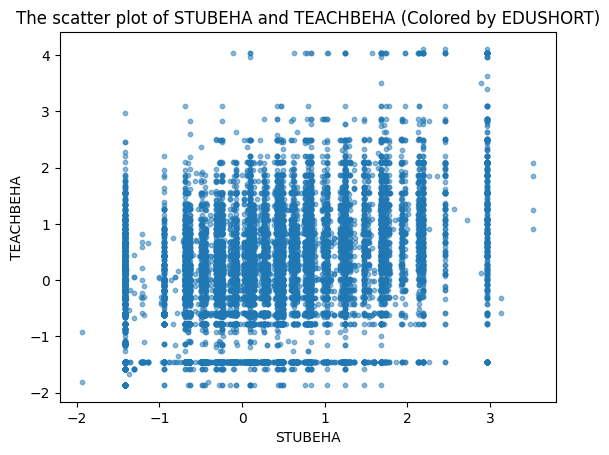

In [10]:
import matplotlib.pyplot as plt
#T2
#Q1
# 选择特征（示例）
plt.scatter(df['EDUSHORT'], df['STAFFSHORT']
            , s=10, alpha=0.5, 
            )
plt.xlabel('STUBEHA')
plt.ylabel('TEACHBEHA')
plt.title('The scatter plot of STUBEHA and TEACHBEHA (Colored by EDUSHORT)')
plt.show()


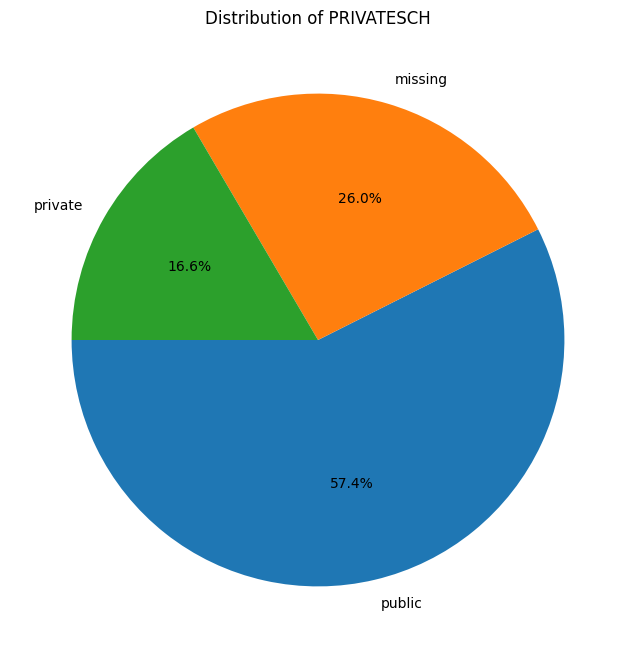

In [14]:
#Q2

#PRIVATESCH的分布
labels = df['PRIVATESCH'].value_counts().index
sizes = df['PRIVATESCH'].value_counts().values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of PRIVATESCH')
plt.show()

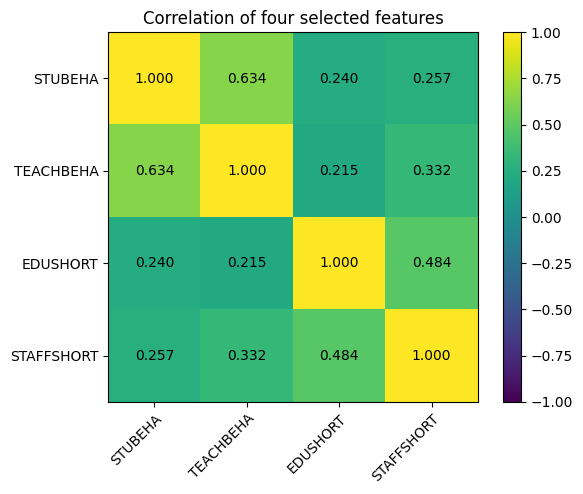

In [ ]:
#Q3
cor_npy = correlation.to_numpy()
#correlation为DataFrame类型，to_numpy()将其转换为numpy数组
#DataFrame索引方式与Numpy数组不同
plt.clf()
plt.title("Correlation of four selected features")
plt.xticks(ticks=[0,1,2,3],labels=selected.columns,rotation=45, rotation_mode="anchor", ha="right")
plt.yticks(ticks=[0,1,2,3],labels=selected.columns)
for i in range(4):
    for j in range(4):
        plt.text(j, i, f"{cor_npy[i,j]:.3f}", va="center", ha="center")
plt.imshow(correlation, vmin=-1, vmax=1)
#.imshow()函数显示图像 vmin和 vmax 分别表示颜色映射的最小值和最大值
#correlation 表示输出为相关系数矩阵
plt.colorbar()
plt.show()


<Figure size 640x480 with 0 Axes>

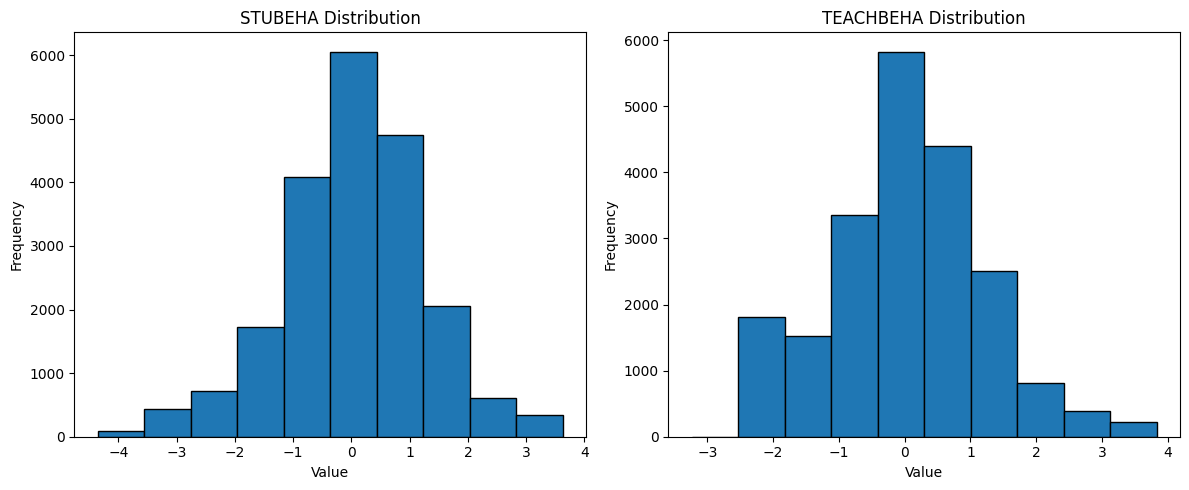

In [18]:
#T3
#Q1
df2 = df[['STUBEHA', 'TEACHBEHA']].dropna()
#.dropna()表示删除缺失值
data_stu=df2["STUBEHA"].to_numpy()
data_tea=df2["TEACHBEHA"].to_numpy()

plt.clf()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df2['STUBEHA'], bins=10, edgecolor='black')
plt.title('STUBEHA Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df2['TEACHBEHA'], bins=10, edgecolor='black')
plt.title('TEACHBEHA Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 结论：STUBEHA近似正态，TEACHBEHA右偏，不满足正态分布。

#### `.dropna()`表示删除缺失值

#### `plt.subplot(numRows, numCols, plotNum)`
numRows 和 numCols 分别指定子图在图形窗口中的行数和列数。
plotNum 指定当前子图的位置，按照从左到右、从上到下的顺序进行编号

#### `plt.tight_layout()`
自动调整子图布局

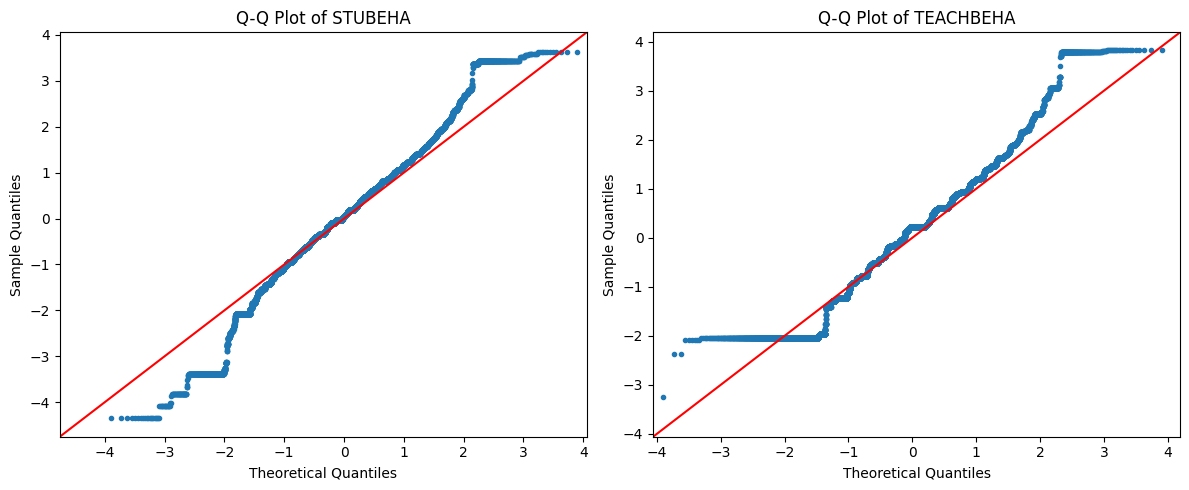

In [19]:
#Q2
import statsmodels.api as sm

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
sm.qqplot(df2['STUBEHA'], line='45',markersize=3,ax=axs[0])
plt.title('Q-Q Plot of STUBEHA')
# plt.show()

plt.subplot(1, 2, 2)
sm.qqplot(df2['TEACHBEHA'], line='45',markersize=3,ax=axs[1])
plt.title('Q-Q Plot of TEACHBEHA')

plt.tight_layout()
plt.show()

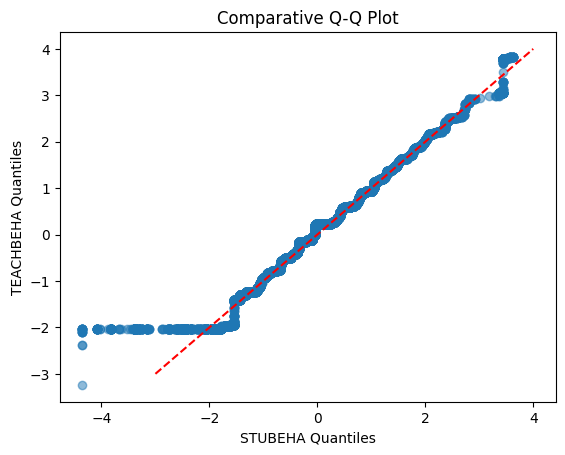

In [ ]:
#Q3

# 计算分位点
stube_quants = df2['STUBEHA'].sort_values().values
teach_quants = df2['TEACHBEHA'].sort_values().values

plt.scatter(stube_quants, teach_quants, alpha=0.5)
plt.plot([-3, 4], 
         [-3, 4], 'r--')
plt.xlabel('STUBEHA Quantiles')
plt.ylabel('TEACHBEHA Quantiles')
plt.title('Comparative Q-Q Plot')
plt.show()

# 结论：两分布形态基本相似，但TEACHBEHA的尾部更重，且STUBEHA的分布范围更广。

In [24]:
#T4
#Q1
#计算STUBEHA和TEACHBEHA的均值和方差

mean_stube = df2['STUBEHA'].mean()
mean_tea = df2['TEACHBEHA'].mean()
var_stube = df2['STUBEHA'].var(ddof=0)
var_tea = df2['TEACHBEHA'].var(ddof=0)
print(f"STUBEHA均值：{mean_stube:f}，方差：{var_stube:f}")
print(f"TEACHBEHA均值：{mean_tea:f}，方差：{var_tea:f}")

'''
样本方差和样本均值即为参数的极大似然估计
而关于无偏性：样本均值是无偏估计，而样本方差不是。
'''

STUBEHA均值：0.041142，方差：1.528892
TEACHBEHA均值：0.108158，方差：1.341275


'\n样本方差和样本均值即为参数的极大似然估计\n而关于无偏性：样本均值是无偏估计，而样本方差不是。\n'

In [ ]:
#Q2

y = df2['STUBEHA'].values
aMLS = np.mean(y)  # 最小二乘解等于均值
print(f"MLS估计值: {aMLS:.4f}")

#极大似然估计和最小二乘的解都为样本均值

MLS估计值: 0.0411


In [27]:
#T5
#Q1
'''
成对检验，每个STUBEHA都对应一个TEACHBEHA。因为在问卷调查中每个学校的STUBEHA和TEACHBEHA都是成对的
单侧检验原假设H0: E(STUBEHA) <= E(TEACHBEHA)
备择假设H1: E(STUBEHA) > E(TEACHBEHA)
'''
import scipy.stats as stats
#Q2
#使用scipy.stats中的相关方法，执行相应的假设检验。
stu_group=df2["STUBEHA"]
tea_group=df2["TEACHBEHA"]
t,p=stats.ttest_rel(stu_group, tea_group)
print(f"t值：{t:f}，p值：{p:f}")
#Q3+Q4
'''
得到的p值极小，可以认为E(STUBEHA) <= E(TEACHBEHA)

可能犯第一类错误，即可能拒绝了实际正确的假设H1，概率为显著性水平alpha=0.05
'''

t值：-9.420646，p值：0.000000


'\n得到的p值极小，可以认为E(STUBEHA) <= E(TEACHBEHA)\n\n可能犯第一类错误，即可能拒绝了实际正确的假设H1，概率为显著性水平alpha=0.05\n'

`df2["STUBEHA"]`返回 Pandas Series

`df2["STUBEHA"].values`返回 NumPy 数组